In [1]:
import pandas as pd

In [9]:
#Load USDA database & transform it into the form we need
food_database = pd.read_excel("2019-2020 FNDDS At A Glance - FNDDS Nutrient Values.xlsx", 
                              header = 1 #set column headers
                              )


,Food code,Main food description,WWEIA Category number,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),...,20:1\n(g),22:1\n(g),18:2\n(g),18:3\n(g),18:4\n(g),20:4\n(g),20:5 n-3\n(g),22:5 n-3\n(g),22:6 n-3\n(g),Water\n(g)
0,11000000,"Milk, human",9602,Human milk,70,1.03,6.89,6.89,0.0,4.38,...,0.040,0.000,0.374,0.052,0.0,0.026,0.000,0.000,0.000,87.50
1,11100000,"Milk, NFS",1004,"Milk, reduced fat",52,3.33,4.83,4.88,0.0,2.14,...,0.002,0.000,0.074,0.008,0.0,0.003,0.000,0.001,0.000,88.92
2,11111000,"Milk, whole",1002,"Milk, whole",61,3.27,4.63,4.81,0.0,3.20,...,0.004,0.000,0.115,0.013,0.0,0.004,0.001,0.002,0.000,88.10
3,11112110,"Milk, reduced fat (2%)",1004,"Milk, reduced fat",50,3.36,4.90,4.89,0.0,1.90,...,0.002,0.000,0.061,0.007,0.0,0.003,0.000,0.001,0.000,89.10
4,11112210,"Milk, low fat (1%)",1006,"Milk, lowfat",43,3.38,5.18,4.96,0.0,0.95,...,0.001,0.000,0.033,0.004,0.0,0.001,0.000,0.000,0.000,89.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5619,99997802,Tomatoes as ingredient in omelet,9999,Not included in a food category,25,1.11,5.48,3.42,1.6,0.23,...,0.000,0.000,0.089,0.004,0.0,0.000,0.000,0.000,0.000,92.57
5620,99997804,Other vegetables as ingredient in omelet,9999,Not included in a food category,39,3.25,5.74,2.73,1.4,0.39,...,0.000,0.000,0.174,0.001,0.0,0.000,0.000,0.000,0.000,89.67
5621,99997810,Vegetables as ingredient in curry,9999,Not included in a food category,52,1.81,11.60,3.25,2.2,0.19,...,0.000,0.000,0.052,0.012,0.0,0.000,0.000,0.000,0.000,85.59
5622,99998130,Sauce as ingredient in hamburgers,9999,Not included in a food category,272,1.34,17.14,13.08,0.6,22.85,...,0.106,0.133,11.810,1.682,0.0,0.015,0.000,0.000,0.002,55.97


Current thought:
- amount of foods are inputs
- quality rates are weights (e.g., amount of calories per 100gs)

In [37]:
#very basic prototype optimization algorithm

import numpy as np
import matplotlib.pyplot as plt

#intialzie amounts
amounts = np.array([[1.0,1.0]])

#rows represent food, cols represent qualities
quality_rates = np.array([[1,2,.5],
                          [1,2,2]])

learning_rate = .001

#goal amounts
targets = [5,10,8]

outputs, errors, amountss = [], [], []

stop_time = 1000
for i in range(stop_time):
    output = np.dot(amounts, quality_rates)
    outputs.append(output)
    #squared error is the loss function
    error = (output - targets)**2
    errors.append(error)
    #derivative of loss wrt to output
    dloss = 2*(output - targets)
    #print(dloss)

    dmax = targets.copy
    dmax = np.ones_like(output)
    dmax[output >= targets] = 0 
    #print(dmax)

    dfoods = dloss * dmax
    #print(dfoods)

    #deriv wrt amounts is quality rate
    dinputs = np.dot(dfoods, quality_rates.T)
    #print(dinputs)

    amounts += -learning_rate * dinputs
    amountss.append(amounts)


print(amounts)
print(output)
print(error)

[[2.27147371 3.43186411]]
[[ 5.70333513 11.40667026  7.9994605 ]]
[[4.94680305e-01 1.97872122e+00 2.91059849e-07]]


How to fully implement for food
- we are going to minimize cost, while trying to meet thresholds for other items

In [553]:
import pandas as pd
import numpy as np
food_data = pd.read_excel(r"C:\Users\Chris\Desktop\Diet Data\Diet Optimization.xlsx", sheet_name="For Python Test")

In [554]:
quality_rates = food_data.iloc[0:20,6:].to_numpy()

In [555]:
target_values = food_data.iloc[24:,2].to_numpy().astype(float).reshape(1,-1)
target_values

array([[0.000e+00, 2.035e+03, 1.530e+02, 5.000e+01, 1.800e+02, 3.000e+01,
        1.000e+03, 4.000e+02, 9.000e+02, 2.400e+00, 1.300e+00, 9.000e+01,
        1.500e+01, 1.500e+01, 1.200e+02, 9.000e-01, 8.000e+00, 4.000e+02,
        1.100e+01, 7.000e+02, 5.500e+01, 3.400e+03, 1.500e+03, 5.500e+02,
        1.200e+00, 1.300e+00, 1.600e+01, 1.600e+00]])

In [556]:
food_limits = food_data.iloc[24:44,6].to_numpy().reshape(1,-1)

In [557]:
food_req = food_data.iloc[24:44,9].to_numpy().reshape(1,-1)

In [581]:
amounts = np.random.rand(1,20) * 100
learning_rate = .00001
errors = []

for i in range(20000):
    outputs = np.dot(amounts, quality_rates)
    error = (outputs - target_values)**2
    errors.append(np.mean(error))

    dloss = 2*(outputs - target_values)
    dmax = np.ones_like(outputs)

    #we are looking to stay calorie target, and minimize costs, so want to avoid those
    #but once all the other ones have hit their goals, set them to 0
    dmax[0,1] = 0 if outputs[0,1] <= target_values[0,1] else dmax[0,1]
    dmax[0,0] = 0
    dmax[0,2:][outputs[0,2:] >= target_values[0,2:]] = 0.0
    
    #normalize gradients
    dfoods = dloss/max(np.sum(dmax),1) * dmax
    
    dinputs = np.dot(dfoods, quality_rates.T)

    amounts += -learning_rate * dinputs.astype(float)
    amounts[amounts < food_req] = food_req[amounts < food_req]
    amounts[amounts > food_limits] = food_limits[amounts > food_limits]

results = np.dot(amounts, quality_rates)
print(results)
print(results - target_values)

[[14.155808953212585 2034.9999999999998 179.57797997655976
  68.81529242163789 179.9999999999996 34.28170963028665
  1000.1617228983503 408.59146563075933 1302.0174770179956
  7.449145355861327 4.527481809188474 260.9002542086943
  15.940338847969652 17.226482993799163 692.5208212512318
  1.6549805687059378 12.55275539596368 637.1596549508862 13.3776382559039
  2549.179130467768 232.79251198908588 4406.882578103283
  3084.716134560312 550.0 1.6418369121504872 3.1438524669190246
  51.10221305988881 2.6503960579204238]]
[[14.155808953212585 -2.2737367544323206e-13 26.57797997655976
  18.815292421637892 -3.979039320256561e-13 4.281709630286649
  0.16172289835026277 8.59146563075933 402.0174770179956
  5.049145355861327 3.2274818091884745 170.90025420869432
  0.9403388479696524 2.226482993799163 572.5208212512318
  0.7549805687059378 4.552755395963681 237.1596549508862 2.3776382559039
  1849.1791304677681 177.79251198908588 1006.8825781032829
  1584.7161345603122 0.0 0.44183691215048726 1.

In [570]:
dmax

array([[0, 0, 0.0, 0.0, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0]], dtype=object)

In [577]:
amounts

array([[2.73567627, 0.2991267 , 0.27706908, 2.45242276, 1.49993777,
        0.99992816, 0.49991063, 1.49966496, 0.24912145, 0.36707064,
        0.01380692, 0.40657016, 0.49981995, 0.09963188, 0.80897415,
        0.99990453, 2.09985866, 0.09858039, 2.29996858, 0.20934312]])

Notes from this go around:
- have been successful in closely matching excel output
- requires averaging gradients (dividing dloss by sum of dmax)
- without cost constraint we get very close to solver results
- with cost constaint it is close, but a bit more different
- ideal learning rate  learning_rate = .00001

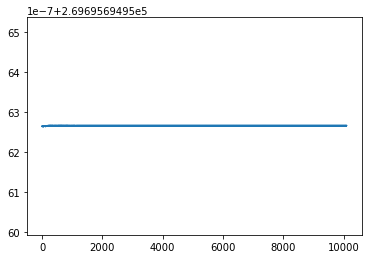

In [573]:
import matplotlib.pyplot as plt

plt.plot(errors[9900:])
plt.show()

In [526]:
amounts

array([[2.84186494, 0.        , 0.        , 2.42886655, 1.46347727,
        0.96179618, 0.46454403, 1.408519  , 0.        , 0.45132228,
        0.44537186, 0.46726505, 0.44023481, 0.        , 0.66744027,
        0.97448963, 2.04262634, 0.        , 2.29336182, 0.2       ]])